In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data_=pd.read_csv(r"C:\ml\da\titanic_data.csv")
data_.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
data=data_.drop(['PassengerId','Name',"Parch",'Ticket',"Cabin"],axis=1)
data.head(0)

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked


In [52]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [53]:
dic2={"S":0,"C":1,"Q":2}
dic={"male":1,"female":0}
data['Sex']=data['Sex'].map(dic)
data['Embarked']=data['Embarked'].map(dic2)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22.0,1,7.2500,0.0
1,1,1,0,38.0,1,71.2833,1.0
2,1,3,0,26.0,0,7.9250,0.0
3,1,1,0,35.0,1,53.1000,0.0
4,0,3,1,35.0,0,8.0500,0.0


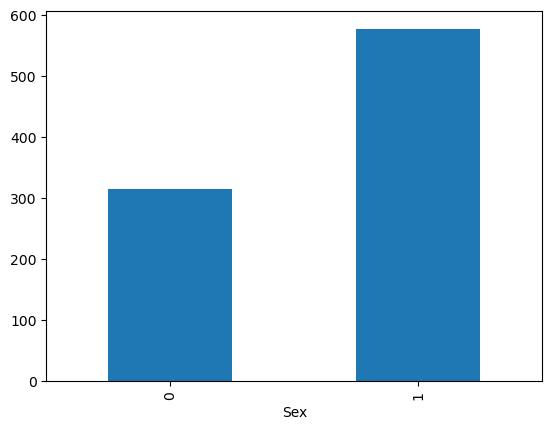

In [54]:
data.groupby("Sex").size().plot(kind="bar")
plt.show()

In [55]:
dat=data.groupby("Sex").size()
data

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22.0,1,7.2500,0.0
1,1,1,0,38.0,1,71.2833,1.0
2,1,3,0,26.0,0,7.9250,0.0
3,1,1,0,35.0,1,53.1000,0.0
4,0,3,1,35.0,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,13.0000,0.0
887,1,1,0,19.0,0,30.0000,0.0
888,0,3,0,NaN,1,23.4500,0.0
889,1,1,1,26.0,0,30.0000,1.0


<Axes: xlabel='Sex', ylabel='count'>

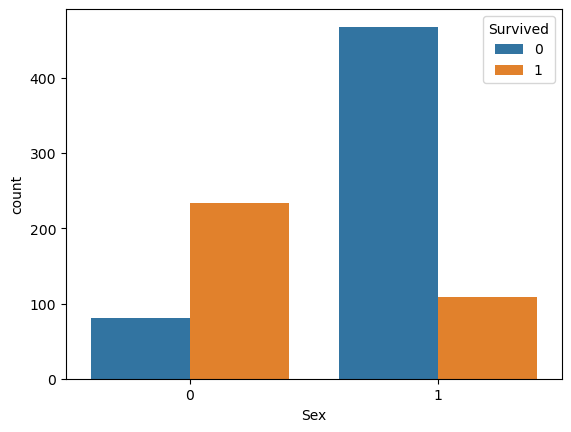

In [56]:
sns.countplot(data,x="Sex",hue="Survived")

<Axes: xlabel='Pclass', ylabel='count'>

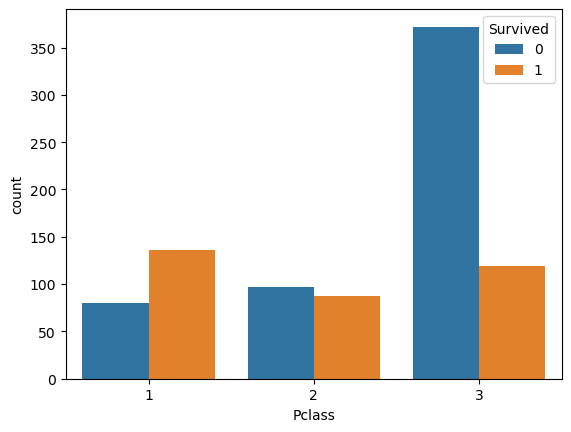

In [57]:
sns.countplot(data=data,x='Pclass',hue="Survived")


C:\Users\preeti\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


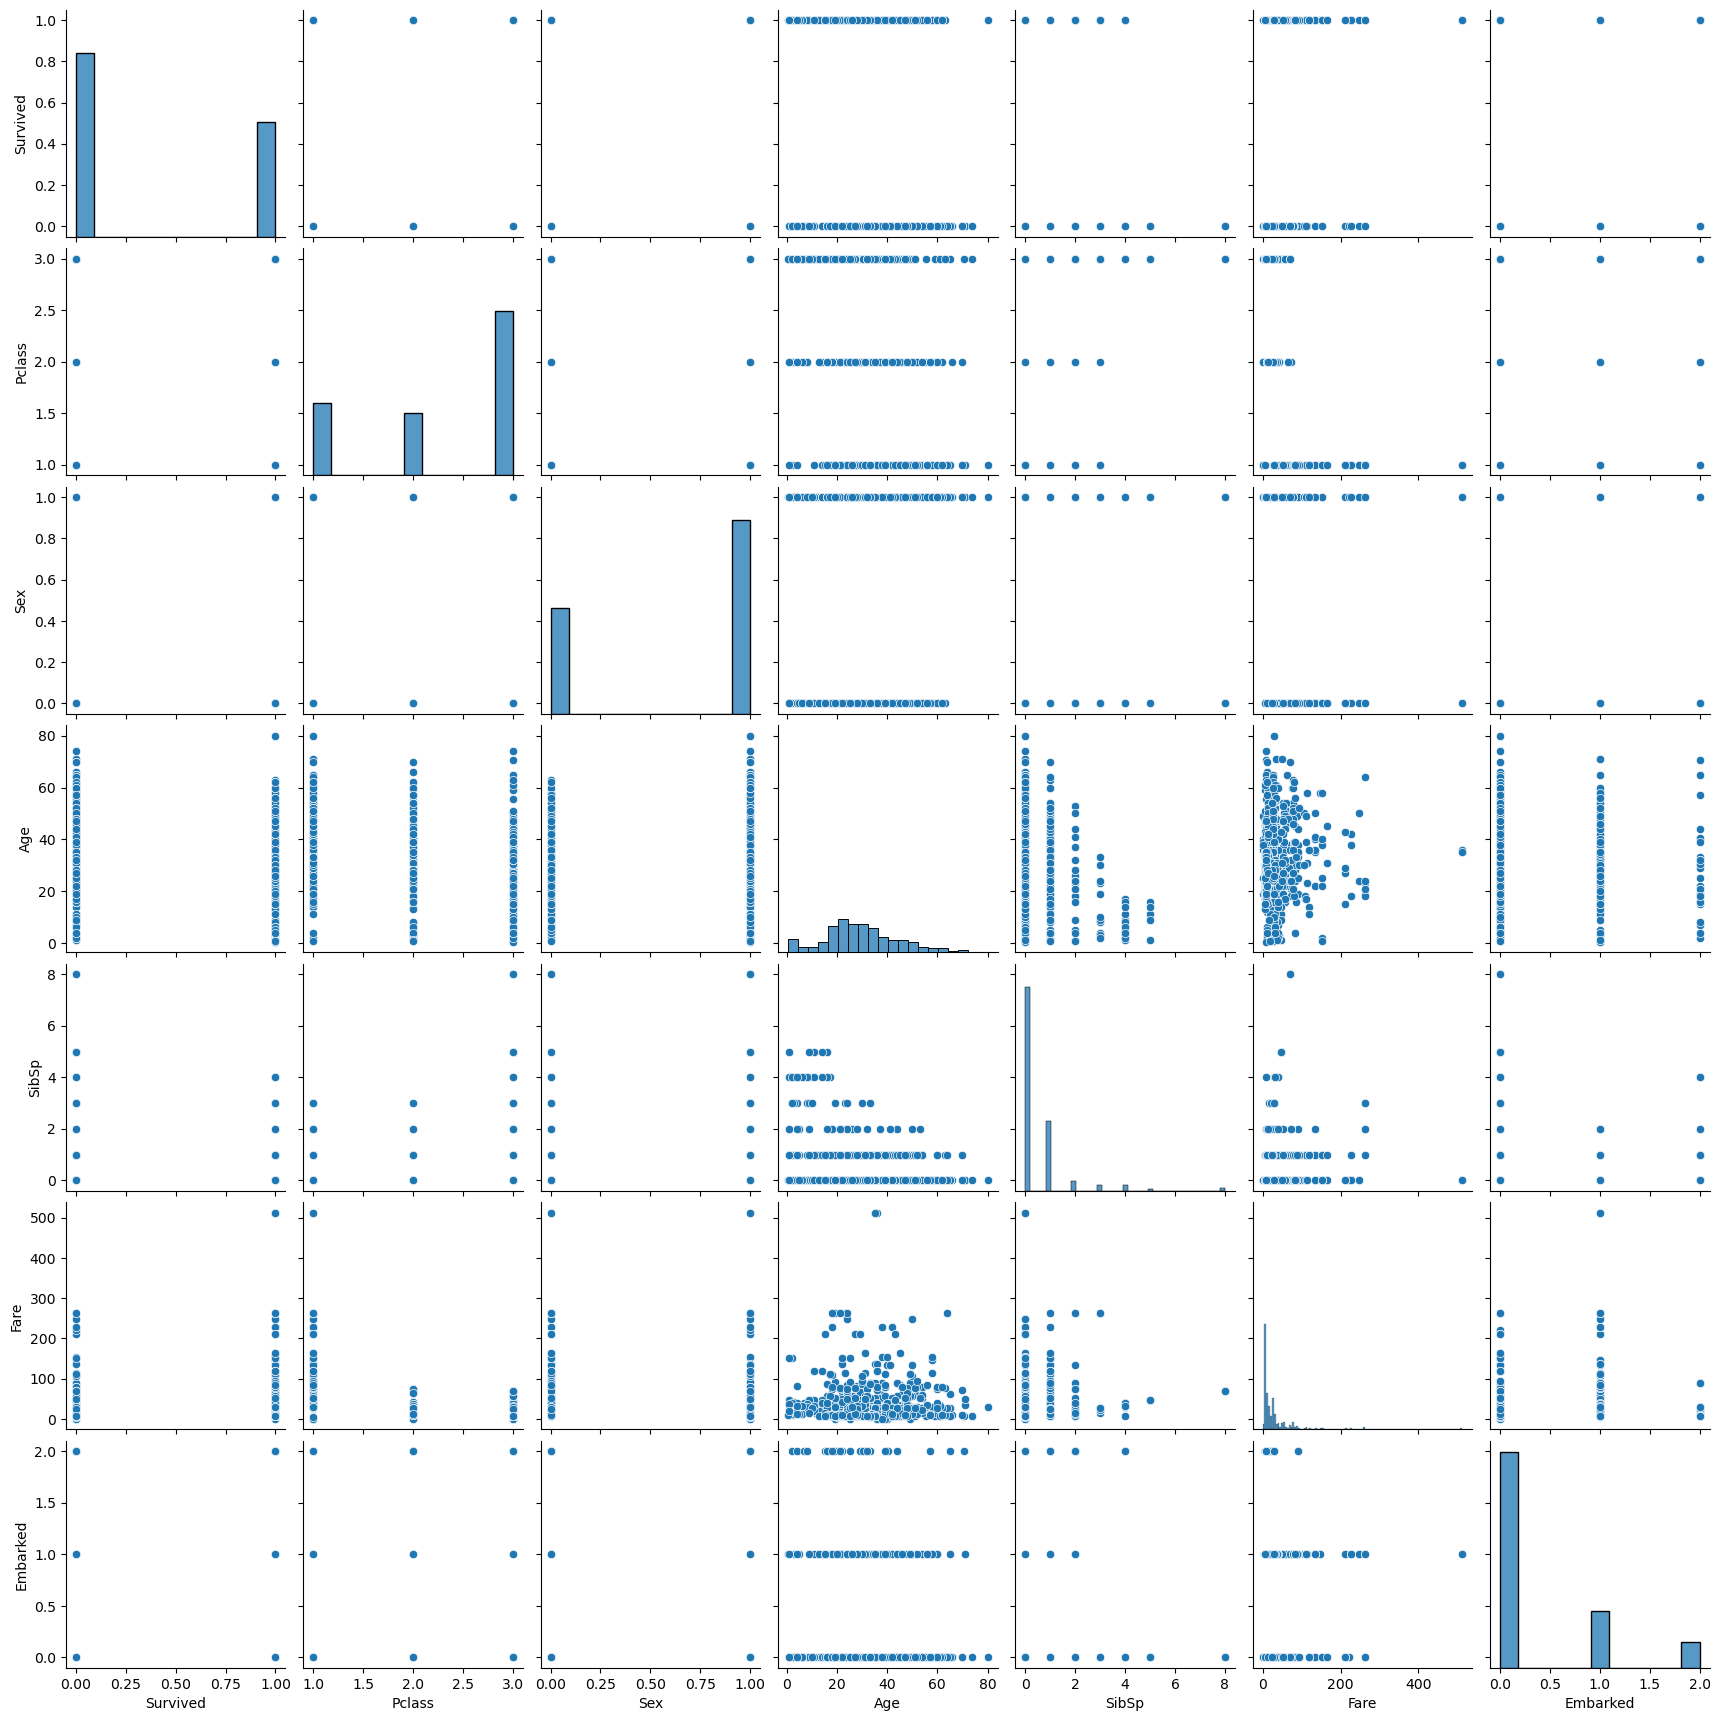

In [58]:
sns.pairplot(data)

<Axes: xlabel='Survived', ylabel='count'>

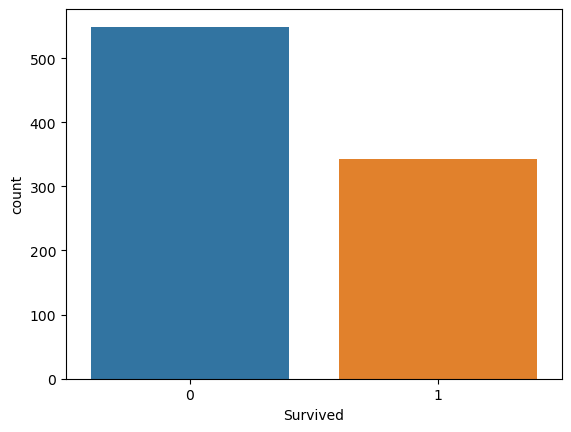

In [59]:
sns.countplot(data,x="Survived")

<Axes: xlabel='SibSp', ylabel='count'>

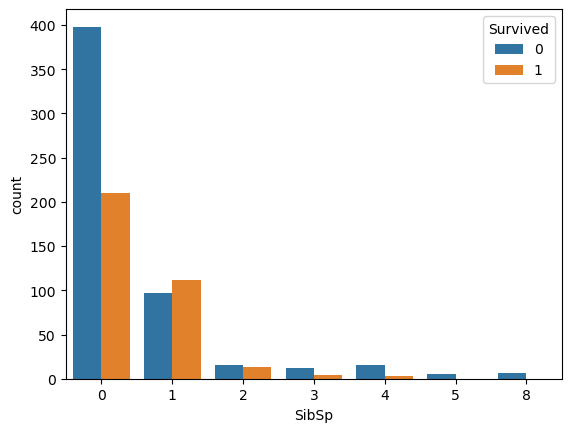

In [60]:
sns.countplot(data,x="SibSp",hue="Survived")

<Axes: >

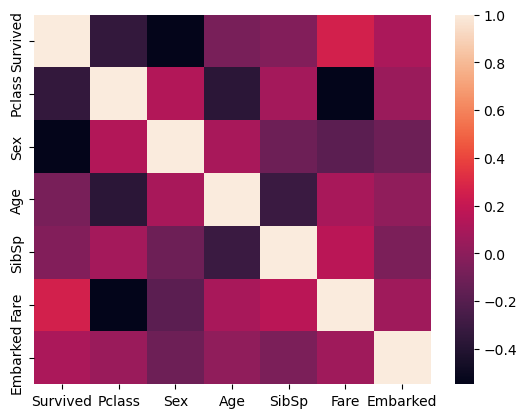

In [61]:
sns.heatmap(data.corr())

<Axes: xlabel='Sex', ylabel='Survived'>

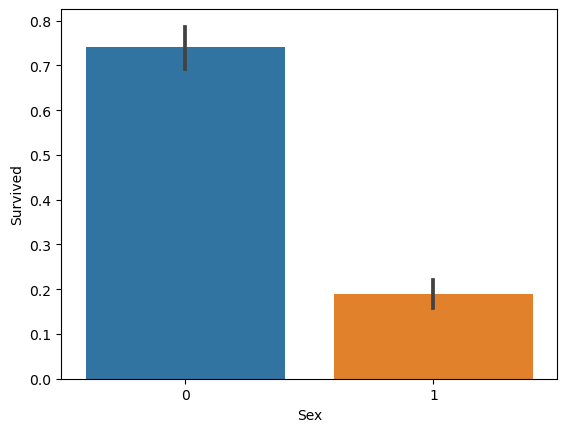

In [62]:
sns.barplot(x='Sex',y="Survived",data=data)

<Axes: xlabel='Pclass', ylabel='Survived'>

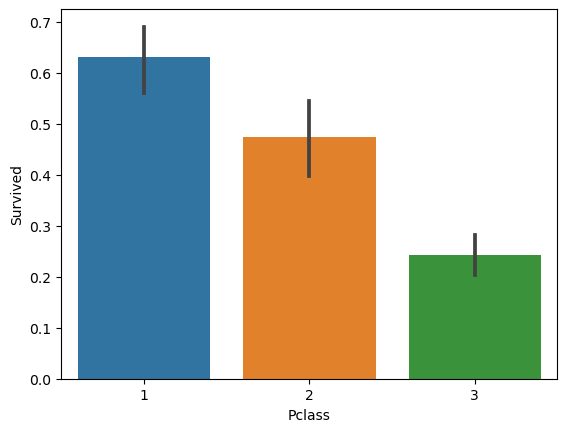

In [63]:
sns.barplot(data,x="Pclass",y="Survived")

In [64]:
bins=[-1,0,5,12,18,24,35,60,np.inf]
label=["unkown",'baby','child','teenage','student','young adult','adult','senoir']
data['Agegroup']=pd.cut(data['Age'],bins=bins,labels=label)
data

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Agegroup
0,0,3,1,22.0,1,7.2500,0.0,student
1,1,1,0,38.0,1,71.2833,1.0,adult
2,1,3,0,26.0,0,7.9250,0.0,young adult
3,1,1,0,35.0,1,53.1000,0.0,young adult
4,0,3,1,35.0,0,8.0500,0.0,young adult
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,13.0000,0.0,young adult
887,1,1,0,19.0,0,30.0000,0.0,student
888,0,3,0,NaN,1,23.4500,0.0,NaN
889,1,1,1,26.0,0,30.0000,1.0,young adult


<Axes: xlabel='Agegroup', ylabel='Survived'>

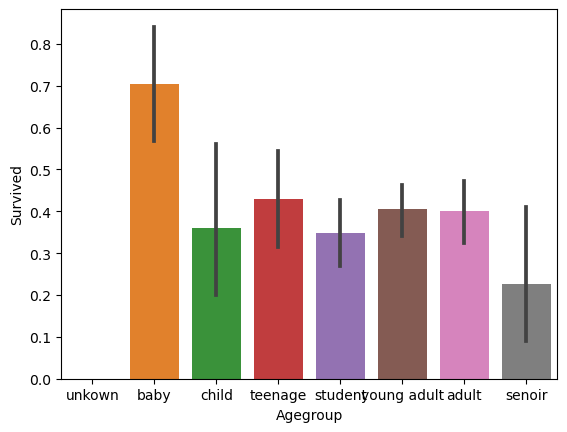

In [65]:
sns.barplot(data=data,x="Agegroup",y="Survived")

In [66]:
data['Embarked']=data['Embarked'].fillna(max)

In [67]:
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
    
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
# fill NaN values in Age column with random values generated
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice
data.isna().sum()
data=data.drop(["Agegroup","Fare"],axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,1,22.0,1,0.0
1,1,1,0,38.0,1,1.0
2,1,3,0,26.0,0,0.0
3,1,1,0,35.0,1,0.0
4,0,3,1,35.0,0,0.0
...,...,...,...,...,...,...
886,0,2,1,27.0,0,0.0
887,1,1,0,19.0,0,0.0
888,0,3,0,36.0,1,0.0
889,1,1,1,26.0,0,1.0


In [88]:

dic={0.0:0,2.0:2,1.0:1}
data['Embarked']=data['Embarked'].map(dic)
data=data.dropna(axis=0)
x=data.iloc[:,1:]
y=data.iloc[:,0]


In [89]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()